# K-Nearest Neighbor Project 2

- Attrition 데이터로 모델링
- 여러 feature -> Attrition(target)

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/Attrition_simple2.csv'
data = pd.read_csv(path)

In [3]:
# 상위 5개 행 확인
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


In [4]:
# 하위 5개 행 확인
data.tail()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
1191,0,32,5,1555,Female,2,Married,5878,No,12,12
1192,0,27,19,1619,Male,1,Divorced,4066,No,11,7
1193,0,29,9,1558,Male,3,Married,2451,No,18,5
1194,0,29,2,469,Male,3,Married,4649,No,14,4
1195,0,43,16,327,Female,4,Married,16064,Yes,22,22


In [5]:
# 기초통계량 확인
data.describe()

,Attrition,Age,DistanceFromHome,EmployeeNumber,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TotalWorkingYears
count,1196.000000,1196.00000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,0.163043,36.94398,9.258361,1035.629599,2.716555,6520.104515,15.251672,11.330268
std,0.369560,9.09270,8.166016,604.340130,1.110962,4665.902253,3.625946,7.823821
min,0.000000,18.00000,1.000000,1.000000,1.000000,1009.000000,11.000000,0.000000
25%,0.000000,30.00000,2.000000,507.750000,2.000000,2928.250000,12.000000,6.000000
50%,0.000000,36.00000,7.000000,1028.000000,3.000000,4973.500000,14.000000,10.000000
75%,0.000000,43.00000,14.000000,1581.250000,4.000000,8420.500000,18.000000,15.000000
max,1.000000,60.00000,29.000000,2068.000000,4.000000,19999.000000,25.000000,40.000000


In [6]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Attrition          1196 non-null   int64 
 1   Age                1196 non-null   int64 
 2   DistanceFromHome   1196 non-null   int64 
 3   EmployeeNumber     1196 non-null   int64 
 4   Gender             1196 non-null   object
 5   JobSatisfaction    1196 non-null   int64 
 6   MaritalStatus      1196 non-null   object
 7   MonthlyIncome      1196 non-null   int64 
 8   OverTime           1196 non-null   object
 9   PercentSalaryHike  1196 non-null   int64 
 10  TotalWorkingYears  1196 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 102.9+ KB


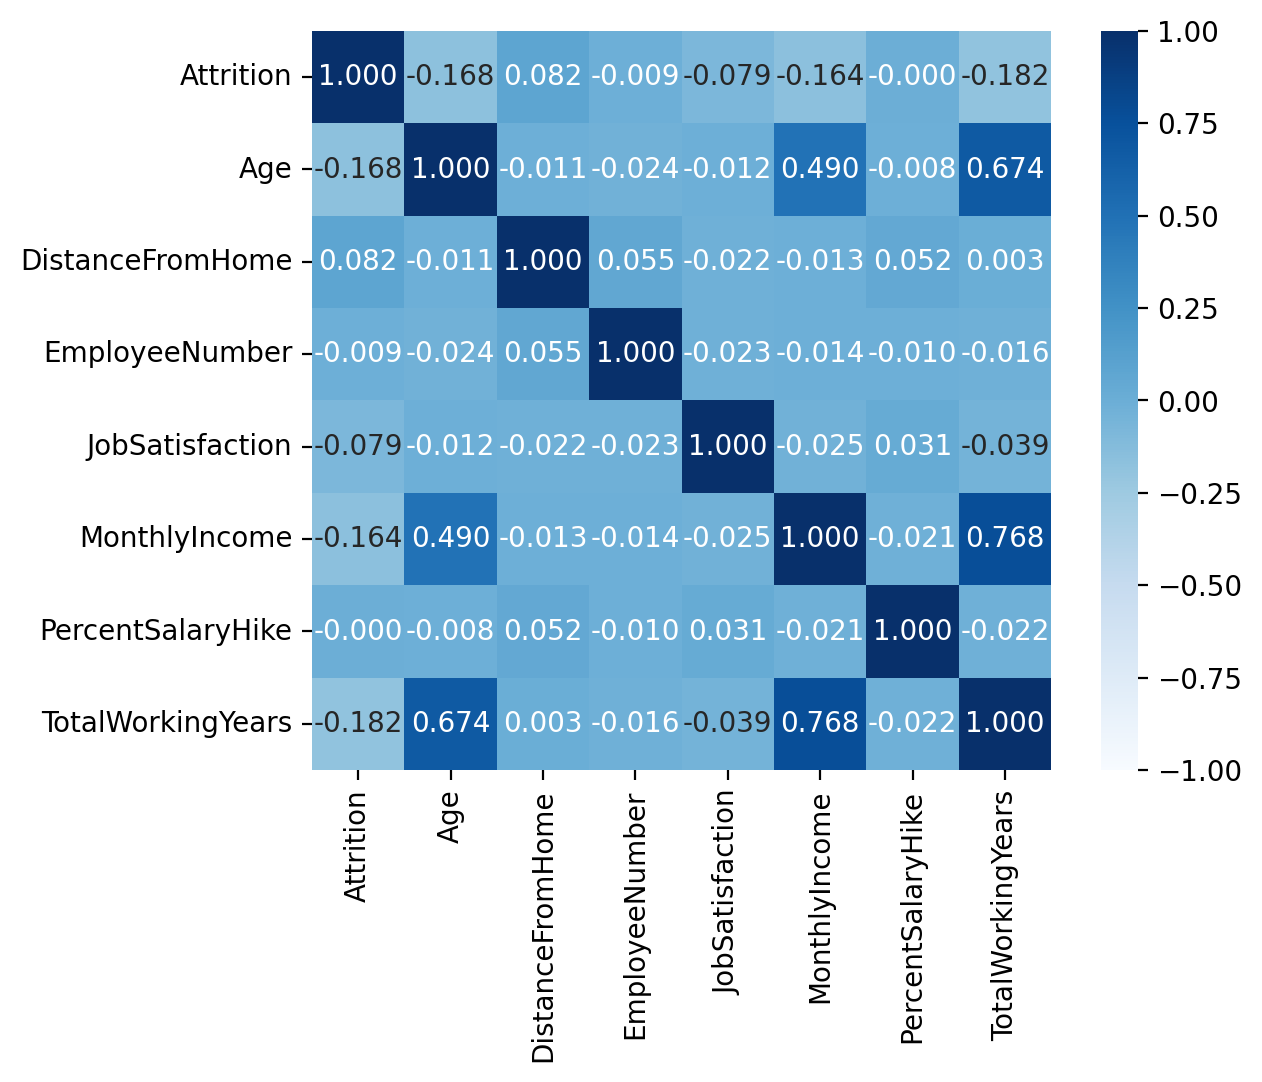

In [7]:
# 상관관계 heatmap으로 확인
sns.heatmap(data.corr(),
            annot=True,
            fmt='.3f',
            vmin=-1, vmax=1,
            square=True,
            cmap='Blues')
plt.show()

In [8]:
# EmployeeNumber 변수 제거
drop_cols = ['EmployeeNumber']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,Male,3,Married,11691,No,11,14
1,0,35,18,Male,4,Single,9362,No,11,10
2,0,42,6,Male,1,Married,13348,No,13,18
3,0,46,2,Female,1,Married,17048,No,23,28
4,1,22,4,Male,3,Single,3894,No,16,4


In [9]:
# target 설정
target = 'Attrition'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [10]:
# Gender, JobSatisfaction, MaritalStatus, OverTime 가변수화
dumm_cols = ['Gender', 'JobSatisfaction', 'MaritalStatus', 'OverTime']
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)
x.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,33,7,11691,11,14,1,0,1,0,1,0,0
1,35,18,9362,11,10,1,0,0,1,0,1,0
2,42,6,13348,13,18,1,0,0,0,1,0,0
3,46,2,17048,23,28,0,0,0,0,1,0,0
4,22,4,3894,16,4,1,0,1,0,0,1,0


In [11]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [12]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
# modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix:
 [[281  19]
 [ 48  11]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       300
           1       0.37      0.19      0.25        59

    accuracy                           0.81       359
   macro avg       0.61      0.56      0.57       359
weighted avg       0.77      0.81      0.79       359

